<a href="https://colab.research.google.com/github/ritvik94/Fraud-Detection-Using-Autoencoders/blob/main/Anomaly_detection_using_autoencoders_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')

In [ ]:
print(data.shape)
print(data.columns)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


- Time shows the time elapsed from the first transaction in the dataset
- V1 to V28 shows the key transaction attributes obtained from pca and they are anonymized, they have been scaled and normalized.
- Amount shows the monetory value of the transaction
- Class shows the class label of normal or fraud

In [ ]:
data.head(100)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64.0,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
97,67.0,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85,0
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0


Checking for null values

In [ ]:
data.isna().sum().sum()

np.int64(0)

To check the number of normal and fraud transactions

In [ ]:
pd.value_counts(data['Class'])

<ipython-input-6-bacf519e6d9d>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Class'])


,count
Class,
0,284315
1,492


To show the normal and fraud transactions

<ipython-input-7-b595e4535fe2>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


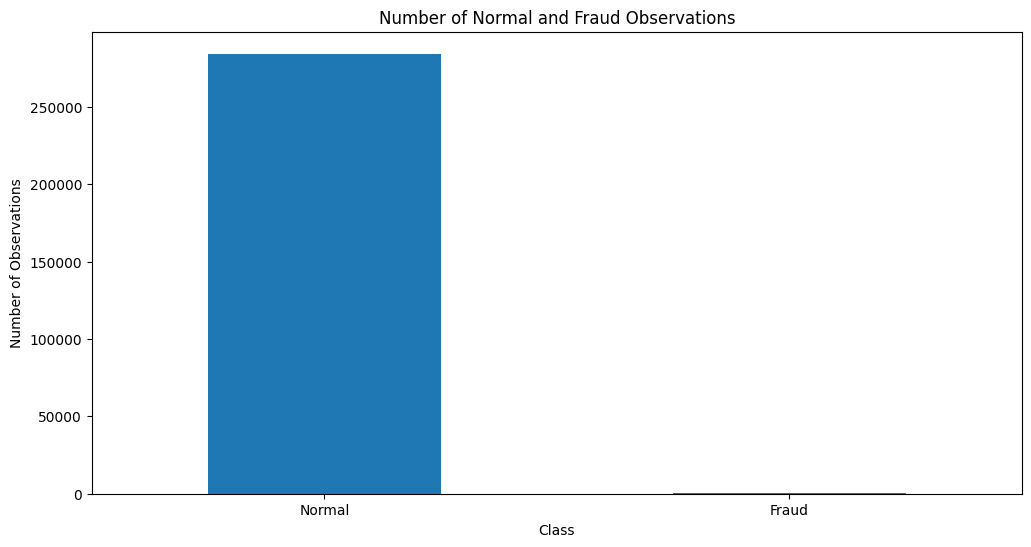

In [ ]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, figsize=(12, 6))
LABELS = ["Normal","Fraud"]
plt.xticks(range(2), LABELS)
plt.title("Number of Normal and Fraud Observations")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

Divide the dataset into two dataframes, one with the normal transactions and the other with the fraud transactions

In [ ]:
normal_df = data[data['Class']==0]
fraud_df = data[data['Class']==1]

The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

- count - The number of not-empty values.
- mean - The average (mean) value.
- std - The standard deviation.
- min - the minimum value.
- 25% - The 25% percentile*.
- 50% - The 50% percentile*.
- 75% - The 75% percentile*.
- max - the maximum value.

Compare the values of normal and fraud transactions to identify the differences between them

For the normal transactions

In [ ]:
normal_df.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


For the fraud transactions

In [ ]:
fraud_df.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


- bins = np.linspace(200, 2500, 100)
creates 100 intervals betwenn 200 dollars and 2500 dollars amount
- alpha shows the opacity of the bar, if 1 it is fully opaque and opacity reduces with the number.
- Density is where the histogram is normalized, the histogram displays a probabality density function

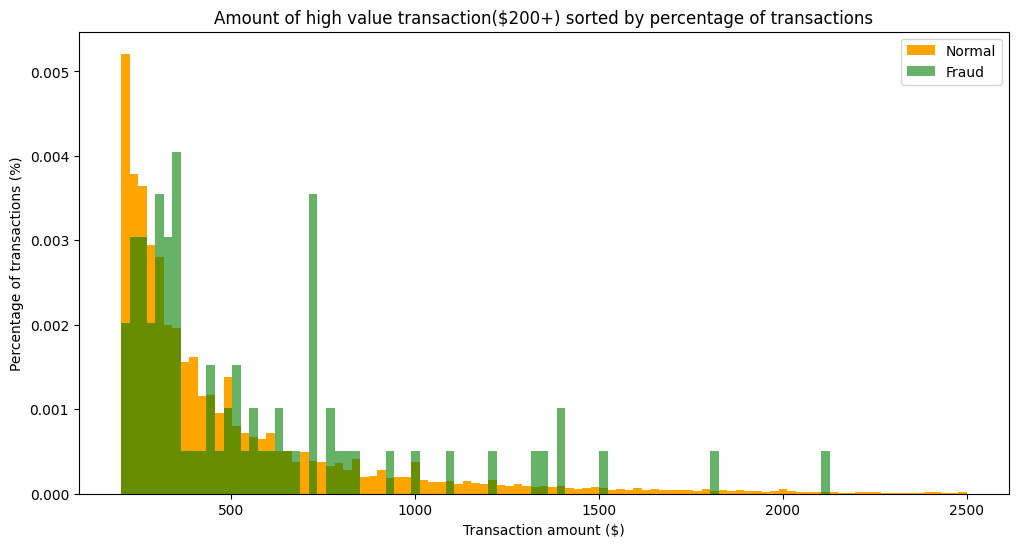

In [ ]:
import numpy as np
import seaborn as sns
bins = np.linspace(200, 2500, 100)
plt.figure(figsize=(12, 6))
plt.hist(normal_df.Amount, bins, alpha=1, density=True, label='Normal', color='orange')
plt.hist(fraud_df.Amount, bins, alpha=0.6, density=True, label='Fraud', color='green')
plt.legend(loc='upper right')
plt.title("Amount of high value transaction($200+) sorted by percentage of transactions")
plt.xlabel("Transaction amount ($)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

To show the value of the both normal and fraud transactions compared to the tie

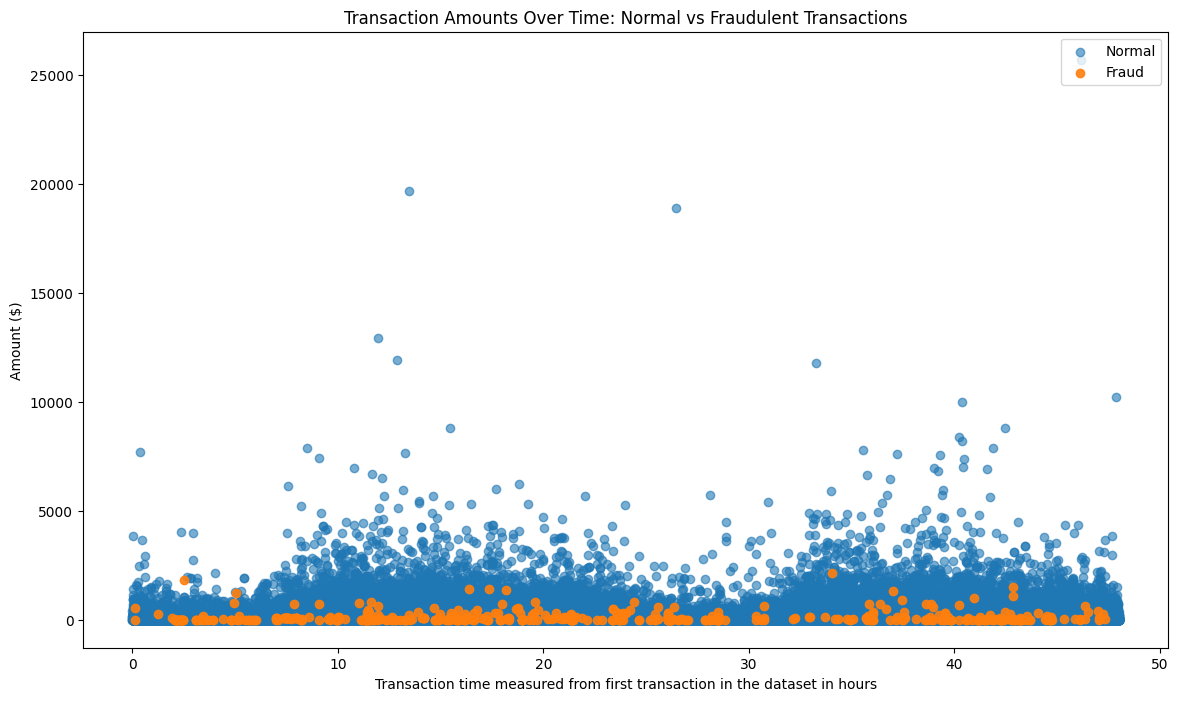

In [ ]:
plt.figure(figsize=(14, 8))
plt.scatter((normal_df.Time/(60*60)), normal_df.Amount, alpha=0.6, label='Normal')
plt.scatter((fraud_df.Time/(60*60)), fraud_df.Amount, alpha=0.9, label='Fraud')
plt.title("Transaction Amounts Over Time: Normal vs Fraudulent Transactions")
plt.xlabel("Transaction time measured from first transaction in the dataset in hours")
plt.ylabel('Amount ($)')
plt.legend(loc='upper right')
plt.show()

Scale and normalize the values, since other values are already scaled and normalized, do it for time and amount

In [ ]:
from sklearn.preprocessing import StandardScaler
df_normal = data.copy() # create a new dataframe by copying the data variable, so the changes here do not affect the original
df_normal['Time'] = StandardScaler().fit_transform(df_normal['Time'].values.reshape(-1, 1))
df_normal['Amount'] = StandardScaler().fit_transform(df_normal['Amount'].values.reshape(-1, 1))

Divide the train and test set

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_normal, test_size=0.2, random_state=42) # random state ensures the split is reproducible
train_x = train_x[train_x.Class == 0]       # we are only keeping the normal transactions in the training data and filter out the fraud transactions
train_x = train_x.drop(['Class'], axis=1)   # Since we are only using normal transactions in training, the class column is no longer needed since everything is a normal transaction

test_y = test_x['Class']                    # save the class column from the test set and contains the actual labels, this can be used for model evaluation
test_x = test_x.drop(['Class'], axis=1)     # drop the class column, so it only the features that the model can use to make predictions, without the actual labels

train_x = train_x.values                    # convert dataframes to ndarray
test_x = test_x.values

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers # regularization to prevent overfitting

input_dim = train_x.shape[1] # no of columns become the no of neurons in the input layer of neural network
learning_rate = 1e-7 # 0.0000001, it is a slow but stable learning rate

input_layer = Input(shape=(input_dim, )) # this doesnt expect not a single value

encoder = Dense(18, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)# 18 - This is the size of the compressed representation (latent space) in an autoencoder
# uses lasso regularization and uses tanh to support both negative and positive values
encoder = Dense(10, activation="relu")(encoder) # faster learning and non linearity
encoder = Dense(6, activation="tanh")(encoder) # it ensures the output is centered around 0

decoder = Dense(6, activation='relu')(encoder) # takes encoded representation from the encoder to expand it back to a higher dimension
decoder = Dense(10, activation='tanh')(decoder) # expands the representation into a higher dimension
decoder = Dense(input_dim, activation='relu')(decoder) # reconstruction takes place, data is expanded to the original dimnesion

autoencoder = Model(inputs=input_layer, outputs=decoder) # combines encoder and decoder

In [ ]:
autoencoder.compile(optimizer='adam',
                    metrics=['accuracy'],
                    loss='mean_squared_error')
history = autoencoder.fit(x=train_x, y=train_x, # x is the input data (training data), y is target data (training data)
                          epochs=50, # defines the number of epochs, epoch is the no. of times the model will see the entire training dataset
                          batch_size=128,  # Batch size determines how many samples are processed before updating the model's weights. this is mini batcch learning
                          shuffle=True, # ensures the data is passed in a random order
                          validation_data=(test_x, test_x), # this validation data is used to evaluate the model perofrmance after each epoch
                          verbose=1,
                          ).history

Epoch 1/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.4173 - loss: 0.9206 - val_accuracy: 0.5987 - val_loss: 0.8467
Epoch 2/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.5993 - loss: 0.8143 - val_accuracy: 0.5965 - val_loss: 0.8155
Epoch 3/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6037 - loss: 0.7834 - val_accuracy: 0.6232 - val_loss: 0.8014
Epoch 4/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6302 - loss: 0.7703 - val_accuracy: 0.6453 - val_loss: 0.7877
Epoch 5/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6480 - loss: 0.7738 - val_accuracy: 0.6557 - val_loss: 0.7806
Epoch 6/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6562 - loss: 0.7376 - val_accuracy: 0.6540 - val_loss: 0.7749
Epoch 7/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6623 - loss: 0.7425 - val_accuracy: 0.6639 - val_loss: 0.7701
Epoch 8/50
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6625 - loss: 0.7

Reconstruction error

In [ ]:
test_x_predictions = autoencoder.predict(test_x)
# autoencoder takes test data and tries to reconstruct it, test_x_predictions contains the reconstructed versions of test data
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
# Computes the squared difference between actual (test_x) and predicted (test_x_predictions) values.
# higher the mse, more reconstruction error, which means more likely a fraud transaction
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': test_y})
# Creates a dataframe with reconstuction error and the true classes to compare
print(error_df)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
        Reconstruction_error  True_class
43428              79.196374           1
49906               0.881777           0
29474               0.364143           0
276481              0.357251           0
278846              0.203908           0
...                      ...         ...
75723               0.682165           0
252263              0.202582           0
221246              0.524122           0
81910               0.193695           0
59490               1.738586           0

[56962 rows x 2 columns]


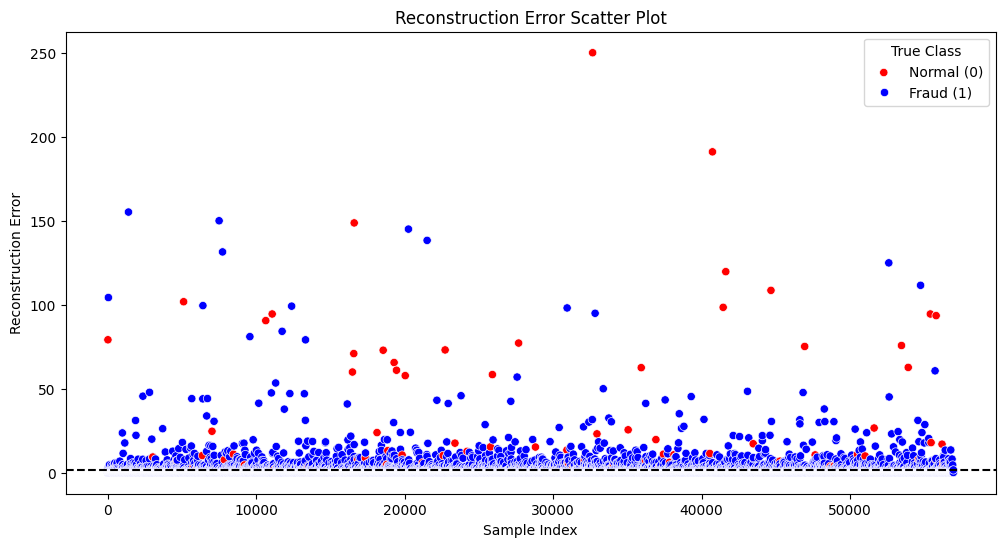

Number of Normal (0) points: 56864
Number of Fraud (1) points: 98


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x=range(len(error_df)), y=error_df["Reconstruction_error"], hue=error_df["True_class"], palette={0: "blue", 1: "red"})
# x axis represents transaction number in the test dataset, y axis represents the mse for each transaction
plt.axhline(np.percentile(mse, 95), color="black", linestyle="--", label="95% Threshold")
# this computes the 95th percentile of the reconstruction error values ie. 95% of the data have reconstuction error below this, so transactions with error greater than this is most likely anomoly
# Transactions above this line are likely to be fraud
plt.title("Reconstruction Error Scatter Plot")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.legend(title="True Class", labels=["Normal (0)", "Fraud (1)"])
plt.show()
num_normal = (error_df["True_class"] == 0).sum()
num_fraud = (error_df["True_class"] == 1).sum()
print("Number of Normal (0) points:", num_normal)
print("Number of Fraud (1) points:", num_fraud)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Accuracy: 95.12833116814718

Confusion Matrix:
[[54101  2763]
 [   12    86]]


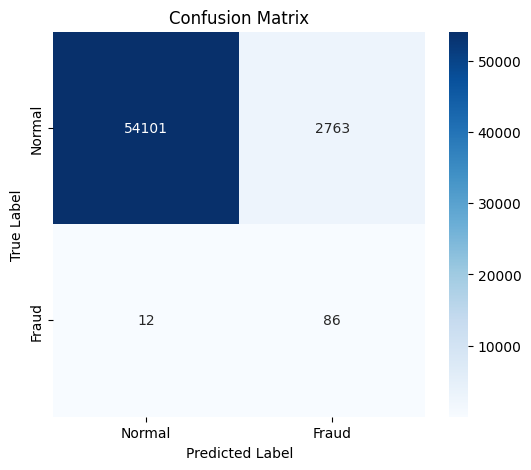

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Determine a threshold for anomaly detection (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(mse, 95)

# Classify as fraud (1) if reconstruction error is above the threshold
predictions = (mse > threshold).astype(int)

# Compute accuracy and confusion matrix
accuracy = accuracy_score(test_y, predictions)
conf_matrix = confusion_matrix(test_y, predictions)

print(f"\nAccuracy: {accuracy * 100}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Plot the model loss

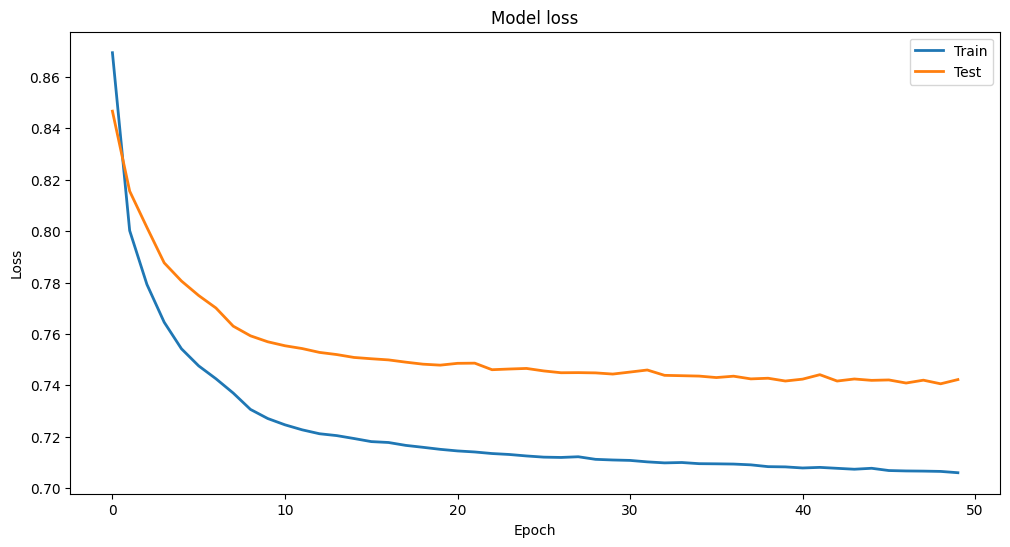

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()